In [ ]:
import os
import shutil
import random

# Define paths (you should replace this with your actual path to the corrosion dataset)
original_dataset_path = "Corrosion"
rust_path = os.path.join(original_dataset_path, "rust")
no_rust_path = os.path.join(original_dataset_path, "no_rust")

# Create test set directory
test_set_path = "Corrosion_test_set"
os.makedirs(os.path.join(test_set_path, "rust"), exist_ok=True)
os.makedirs(os.path.join(test_set_path, "no_rust"), exist_ok=True)

# Randomly select 10 images from each class for the test set
test_rust_images = random.sample(os.listdir(rust_path), 10)
test_no_rust_images = random.sample(os.listdir(no_rust_path), 10)

# Move selected images to the test set folder
for img in test_rust_images:
    shutil.move(os.path.join(rust_path, img), os.path.join(test_set_path, "rust", img))

for img in test_no_rust_images:
    shutil.move(os.path.join(no_rust_path, img), os.path.join(test_set_path, "no_rust", img))

(test_rust_images, test_no_rust_images)
 

Found 8 images belonging to 2 classes.
Found 1 images belonging to 2 classes.
Epoch 1/500
1/1 [==============================] - 1s 744ms/step - loss: 0.6802 - accuracy: 0.5000 - val_loss: 5.0825e-05 - val_accuracy: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 178ms/step - loss: 2.9760 - accuracy: 0.5000 - val_loss: 5.0209 - val_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 178ms/step - loss: 2.6237 - accuracy: 0.5000 - val_loss: 1.9495 - val_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 169ms/step - loss: 0.9369 - accuracy: 0.5000 - val_loss: 0.1118 - val_accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 171ms/step - loss: 0.5248 - accuracy: 0.5000 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 228ms/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.0901 - val_accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 206ms/step

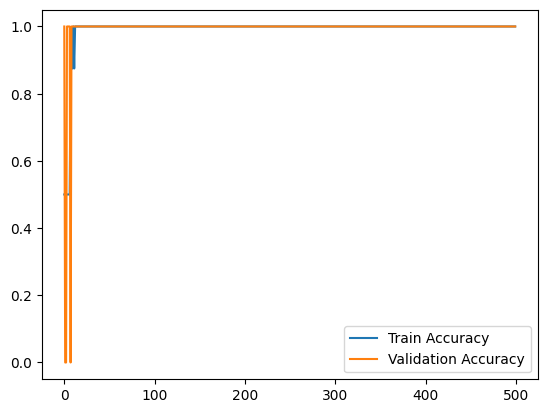

In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Set image size and paths
img_height, img_width = 150, 150
batch_size = 16
train_dir = 'Corrosion'

# Load training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=500,
    validation_data=val_generator
)

# Save the model
model.save("simple_cnn_corrosion.h5")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [12]:
test_dir = 'corrosion_test_set'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

model = load_model("simple_cnn_corrosion.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 20 images belonging to 2 classes.
20/20 [==============================] - 0s 11ms/step - loss: 1.5252 - accuracy: 0.7000
Test Accuracy: 70.00%


Found 8 images belonging to 2 classes.
Found 1 images belonging to 2 classes.
Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 0.7936 - accuracy: 0.5000 - val_loss: 1.1824 - val_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 1s 752ms/step - loss: 0.7738 - accuracy: 0.5000 - val_loss: 1.1199 - val_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 1s 825ms/step - loss: 0.7581 - accuracy: 0.5000 - val_loss: 1.0704 - val_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 1s 876ms/step - loss: 0.7453 - accuracy: 0.5000 - val_loss: 1.0157 - val_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 1s 837ms/step - loss: 0.7321 - accuracy: 0.5000 - val_loss: 0.9582 - val_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 1s 820ms/step - loss: 0.7221 - accuracy: 0.5000 - val_loss: 0.9127 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 1s 7

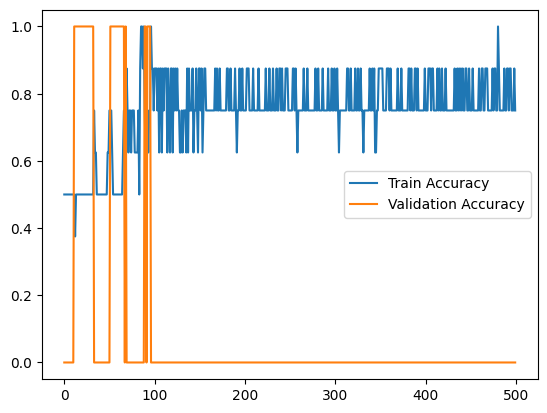

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Paths
train_dir = 'Corrosion'
img_height, img_width = 224, 224
batch_size = 16

# Data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load pre-trained ResNet50 (exclude top)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_generator, validation_data=val_generator, epochs=500)

# Save
model.save("resnet50_corrosion.h5")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = 'corrosion_test_set'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

model = load_model("resnet50_corrosion.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"ResNet50 Test Accuracy: {accuracy * 100:.2f}%")


Found 20 images belonging to 2 classes.


20/20 [==============================] - 6s 192ms/step - loss: 0.6701 - accuracy: 0.5000
ResNet50 Test Accuracy: 50.00%


In [16]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load models
cnn_model = load_model("simple_cnn_corrosion.h5")
resnet_model = load_model("resnet50_corrosion.h5")

# Paths
test_dir = "Corrosion_test_set"
true_labels = []
file_names = []
cnn_inputs = []
resnet_inputs = []

# Read and preprocess images for both models
for label in ["rust", "no_rust"]:
    folder = os.path.join(test_dir, label)
    for fname in os.listdir(folder):
        if fname.lower().endswith((".jpg", ".png")):
            img_path = os.path.join(folder, fname)

            # For CNN (150x150)
            cnn_img = image.load_img(img_path, target_size=(150, 150))
            cnn_img_array = image.img_to_array(cnn_img) / 255.0
            cnn_inputs.append(cnn_img_array)

            # For ResNet50 (224x224)
            resnet_img = image.load_img(img_path, target_size=(224, 224))
            resnet_img_array = image.img_to_array(resnet_img) / 255.0
            resnet_inputs.append(resnet_img_array)

            true_labels.append(label)
            file_names.append(fname)

# Convert to numpy arrays
cnn_inputs = np.array(cnn_inputs)
resnet_inputs = np.array(resnet_inputs)

# Get predictions
cnn_preds_raw = cnn_model.predict(cnn_inputs)
resnet_preds_raw = resnet_model.predict(resnet_inputs)

cnn_preds = ["rust" if p > 0.5 else "no rust" for p in cnn_preds_raw]
resnet_preds = ["rust" if p > 0.5 else "no rust" for p in resnet_preds_raw]

# Output results
print("True Labels:")
print(true_labels)
print("\nCNN Predictions:")
print(cnn_preds)
print("\nResNet50 Predictions:")
print(resnet_preds)


1/1 [==============================] - 2s 2s/step
True Labels:
['rust', 'rust', 'rust', 'rust', 'rust', 'rust', 'rust', 'rust', 'rust', 'rust', 'no_rust', 'no_rust', 'no_rust', 'no_rust', 'no_rust', 'no_rust', 'no_rust', 'no_rust', 'no_rust', 'no_rust']

CNN Predictions:
['no rust', 'no rust', 'rust', 'no rust', 'rust', 'rust', 'rust', 'rust', 'rust', 'rust', 'no rust', 'no rust', 'no rust', 'no rust', 'no rust', 'no rust', 'no rust', 'rust', 'rust', 'rust']

ResNet50 Predictions:
['no rust', 'rust', 'no rust', 'no rust', 'rust', 'no rust', 'no rust', 'rust', 'rust', 'rust', 'no rust', 'no rust', 'rust', 'rust', 'rust', 'rust', 'rust', 'no rust', 'no rust', 'no rust']
